In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.neighbors.kde import KernelDensity

In [2]:
fname = 'AB_NYC_2019.csv'

In [3]:
#getting the data set
data = pd.read_csv(fname)

#making some variables into string because they are not numerical variables
data.id = data.id.astype(str)
data.host_id = data.host_id.astype(str)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#eliminating exagerated minimum number of nights
x = data.loc[data.minimum_nights >= 400].index.tolist()
data = data.drop(x, axis = 0)

In [5]:
"""
Eliminating useless data because are no longer available hotels, it can be seen in availability and it also in the price
"""
data = data.loc[(data.price != 0) & (data.availability_365 != 0)]
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [6]:
#getting the registers that are from Manhattan and are private rooms
data_manhattan = data.loc[(data.neighbourhood_group == 'Manhattan') & (data.room_type == 'Private room')]

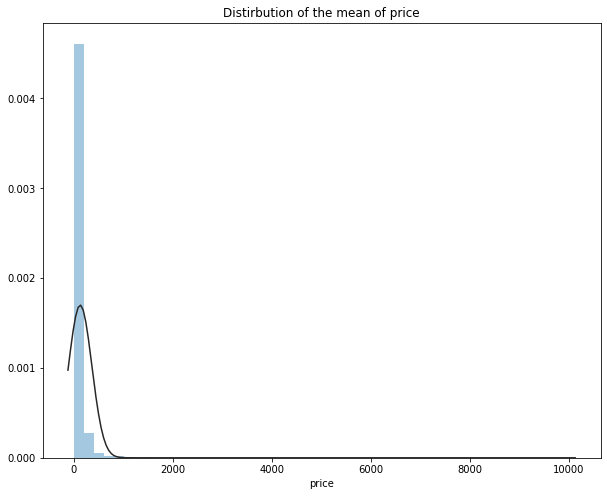

In [36]:
plt.rcParams['figure.figsize'] = [10,8]
hist = sns.distplot(data_manhattan.price, fit = norm, kde = False)
plt.title("Distirbution of the mean of price")
plt.plot()
fig1 = hist.get_figure()
fig1.savefig("dist_price.png")

In [11]:
#getting the mean and standard deviation
mean_data = data_manhattan.price.mean()
std_data = data_manhattan.price.std()

In [37]:
print(mean_data)
print(std_data)

127.9715600167294
234.6627783933899


In [23]:
#applying z-score, and the one that are less than .3 and greater than 3 are outliers
data_manhattan['outlier'] = (((data_manhattan.price - mean_data)/std_data) >= 3) | (((data_manhattan.price - mean_data)/std_data) <= -3)

c:\users\jeorv\onedrive\favori~2\desktop\escuela\3ercua~1\prepro~1\prepro~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
#outliers
data_manhattan.loc[data_manhattan.outlier == True].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,outlier
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,NaN,NaN,1,365,True
1899,841211,Spacious Centrally Located Apt!!!,3665164,Joseph,Manhattan,Chelsea,40.74660,-73.99219,Private room,999,10,30,2016-10-12,0.40,1,365,True
9883,7603640,Brand new in the heart of Tribeca,8617411,Benjamin,Manhattan,Tribeca,40.71978,-74.00968,Private room,1500,1,0,NaN,NaN,1,365,True
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83,True
15677,12657888,"convenient, furnished APT",68769040,Eva,Manhattan,Upper West Side,40.80183,-73.96373,Private room,980,20,1,2016-07-02,0.03,1,90,True


In [32]:
#checking how many outliers are
data_manhattan.outlier.sum()

43